In [252]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

In [253]:
# libraries

import plotly.offline as py
py.init_notebook_mode(connected=True)

import plotly.graph_objs as go
import plotly.subplots as tls
import seaborn as sns
import matplotlib
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import tarfile
import urllib
import pandas as pd

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

In [255]:
# read the unlabelled data 
X = pd.read_csv ('x_train_gr_smpl.csv')
print(X.shape)
print(X)

(9690, 2304)
          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...   2294  2295  2296   2297  2298  2299  2

In [269]:
# read the class attribute file into Y datafram
Y = pd.read_csv('y_train_smpl.csv')
Y.columns = ['Class']
print(Y.shape)
print(Y)

(9690, 1)
      Class
0         0
1         0
2         0
3         0
4         0
...     ...
9685      9
9686      9
9687      9
9688      9
9689      9

[9690 rows x 1 columns]


In [270]:
#join the two such that Y is the last column

XYraw = pd.concat([X,Y], axis=1)

#check the concatination
print(XYraw)


          0      1      2      3      4      5      6      7      8      9  \
0      78.0   77.0   76.0   82.0   87.0   92.0  104.0  119.0  117.0  120.0   
1      73.0   75.0   79.0   78.0   76.0   75.0   89.0  107.0  133.0  125.0   
2      72.0   75.0   79.0   77.0   81.0   89.0  105.0  109.0   86.0   90.0   
3      67.0   70.0   74.0   80.0   93.0  107.0  110.0   96.0   69.0  100.0   
4      74.0   74.0   73.0   72.0   77.0   87.0  104.0  109.0   84.0   83.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685  247.0  220.0  254.0  213.0  129.0  208.0  254.0  255.0  255.0  255.0   
9686  151.0  118.0  254.0  255.0  255.0  255.0  254.0  254.0  254.0  252.0   
9687  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9688  255.0  253.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0  255.0   
9689  252.0  189.0  238.0  255.0  255.0  245.0  219.0  212.0  140.0   40.0   

      ...  2295  2296   2297  2298  2299  2300   2301   2302   

In [271]:
# check for NaNs
anyNans = XYraw.isnull().sum().sum()
#print NaN count
print('\nNaN Count : ' + str(anyNans)) 


NaN Count : 0


In [272]:
#randomize

XYraw = XYraw.sample(frac=1).reset_index(drop=True)
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      90.0  103.0  116.0  116.0  112.0  104.0  120.0  144.0  158.0  141.0   
1     150.0  149.0  149.0  150.0  150.0  151.0  150.0  149.0  148.0  149.0   
2      74.0  107.0   91.0   78.0   82.0   71.0   79.0   75.0   72.0   58.0   
3     105.0  115.0  127.0  118.0  105.0   89.0   84.0   80.0   78.0   80.0   
4      11.0   11.0   12.0   11.0   11.0   11.0   10.0   10.0   10.0   10.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   40.0   38.0   35.0   32.0   30.0   28.0   28.0   27.0   27.0   30.0   
9686    7.0    6.0    7.0    7.0    9.0   10.0    9.0    8.0    7.0    6.0   
9687   44.0   90.0  134.0  218.0  250.0  251.0  250.0  251.0  251.0  251.0   
9688  255.0  255.0  248.0  210.0  116.0  158.0  254.0  255.0  255.0  255.0   
9689  105.0  155.0  189.0  224.0  248.0  232.0  245.0  217.0  227.0  245.0   

      ...   2295   2296   2297   2298   2299   2300   2301   23

In [273]:
y = XYraw['Class']

In [274]:
# save the labels to a Pandas series target
target = XYraw['Class']
# Drop the label feature
XYraw.drop("Class",axis=1,inplace=True)

In [275]:
print(XYraw)

          0      1      2      3      4      5      6      7      8      9  \
0      90.0  103.0  116.0  116.0  112.0  104.0  120.0  144.0  158.0  141.0   
1     150.0  149.0  149.0  150.0  150.0  151.0  150.0  149.0  148.0  149.0   
2      74.0  107.0   91.0   78.0   82.0   71.0   79.0   75.0   72.0   58.0   
3     105.0  115.0  127.0  118.0  105.0   89.0   84.0   80.0   78.0   80.0   
4      11.0   11.0   12.0   11.0   11.0   11.0   10.0   10.0   10.0   10.0   
...     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
9685   40.0   38.0   35.0   32.0   30.0   28.0   28.0   27.0   27.0   30.0   
9686    7.0    6.0    7.0    7.0    9.0   10.0    9.0    8.0    7.0    6.0   
9687   44.0   90.0  134.0  218.0  250.0  251.0  250.0  251.0  251.0  251.0   
9688  255.0  255.0  248.0  210.0  116.0  158.0  254.0  255.0  255.0  255.0   
9689  105.0  155.0  189.0  224.0  248.0  232.0  245.0  217.0  227.0  245.0   

      ...   2294   2295   2296   2297   2298   2299   2300   23

In [276]:
#PCA analysis

#standardizing the data

from sklearn.preprocessing import StandardScaler
Xs = XYraw.values
X_std = StandardScaler().fit_transform(Xs)

# Calculating Eigenvectors and eigenvalues of Cov matirx
mean_vec=np.mean(X_std,axis=0)
cov_mat=np.cov(X_std.T)
eigvalues ,eigvectors =np.linalg.eig(cov_mat)

# Create a list of (eigenvalue, eigenvector) tuples
eigpairs=[(np.abs(eigvalues[i]),eigvectors[:,i] )for i in range(len(eigvalues))]

# Sort the eigenvalue, eigenvector pair from high to low
eigpairs.sort(key=lambda x:x[0],reverse=True)
# Calculation of Explained Variance from the eigenvalues   
tot=sum(eigvalues)
# Individual explained variance
var_exp=[(i/tot)*100 for i in sorted(eigvalues,reverse=True)]
# Cumulative explained variance
cum_var_exp=np.cumsum(var_exp)

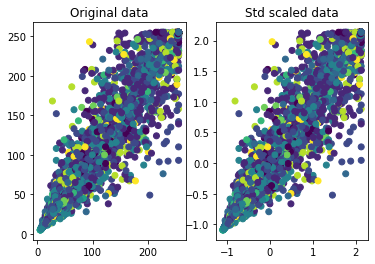

In [277]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
axes[0].scatter(Xs[:,0], Xs[:,1], c=y)
axes[0].set_title("Original data")
axes[1].scatter(X_std[:,0], X_std[:,1], c=y)
axes[1].set_title("Std scaled data")
plt.show()

In [278]:
#Using plotly to visualise individual 
#explained variance and cummulative explained variance


trace1 = go.Scatter(
    x=list(range(784)),
    y= cum_var_exp,
    mode='lines+markers',
    name="'Cumulative Explained Variance'",
   
    line = dict(
        shape='spline',
        color = 'goldenrod'
    )
)
trace2 = go.Scatter(
    x=list(range(784)),
    y= var_exp,
    mode='lines+markers',
    name="'Individual Explained Variance'",
 
     line = dict(
        shape='linear',
        color = 'black'
    )
)
fig = tls.make_subplots(insets=[{'cell': (1,1), 'l': 0.7, 'b': 0.5}],
                          print_grid=True)

fig.append_trace(trace1,1,1)
fig.append_trace(trace2,1,1)


fig.layout.title='explained Variance plots'
fig.layout.xaxis=dict(range=[0,800],title='Feature columns')
fig.layout.yaxis=dict(range=[0,100],title='explained variance')


py.iplot(fig,filename='inset example')

This is the format of your plot grid:
[ (1,1) x,y ]

With insets:
[ x2,y2 ] over [ (1,1) x,y ]



In [279]:
#PCA analysis

#standardizing the data

from sklearn.preprocessing import MinMaxScaler
Xs = XYraw.values
X_mm = MinMaxScaler().fit_transform(Xs)

mean_vec=np.mean(X_mm,axis=0)
cov_mat=np.cov(X_mm.T)
eigvalues ,eigvectors =np.linalg.eig(cov_mat)

eigpairs=[(np.abs(eigvalues[i]),eigvectors[:,i] )for i in range(len(eigvalues))]


eigpairs.sort(key=lambda x:x[0],reverse=True)
   
tot=sum(eigvalues)
var_exp_mm=[(i/tot)*100 for i in sorted(eigvalues,reverse=True)]
cum_var_exp_mm=np.cumsum(var_exp)

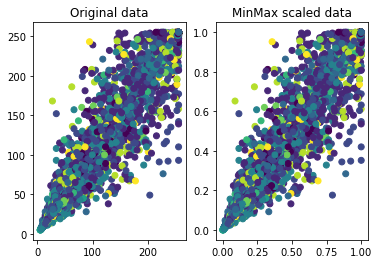

In [280]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1,2)
axes[0].scatter(Xs[:,0], Xs[:,1], c=y)
axes[0].set_title("Original data")
axes[1].scatter(X_mm[:,0], X_mm[:,1], c=y)
axes[1].set_title("MinMax scaled data")
plt.show()

In [281]:
pca=PCA(200)
pca.fit(X_std)

pca2 =PCA(200)
pca2.fit(X_mm)

PCA(n_components=200)

In [282]:
X_pca=pca.transform(X_std)
X_pca2 = pca.transform(X_mm)

In [283]:
X_pca.shape
X_pca2.shape

(9690, 200)

In [284]:
X_std.shape

(9690, 2304)

In [285]:
eigenvalues=pca.components_
eigenvalues.shape

eigenvalues2=pca2.components_
eigenvalues2.shape

(200, 2304)

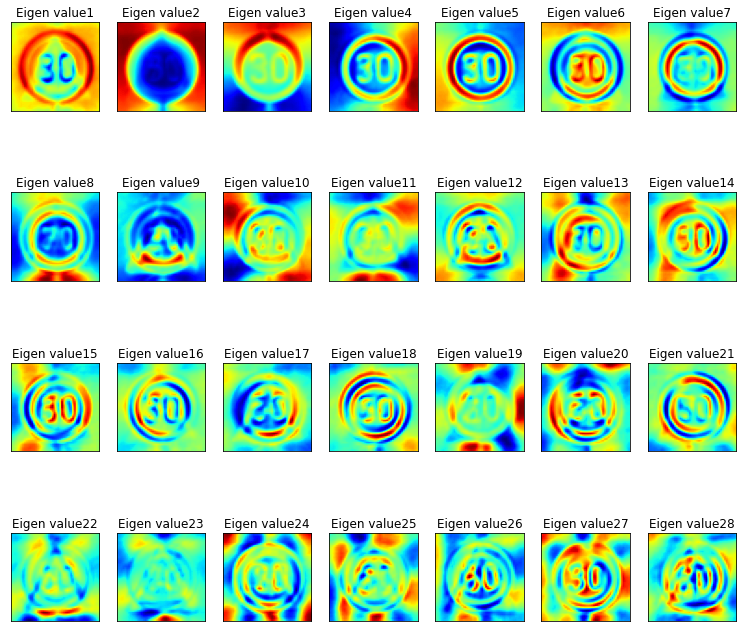

In [286]:
#plotting eigen values
plt.figure(figsize=(13,12))

x_row=4
y_col=7

for i in list(range(x_row*y_col)):
    
    plt.subplot(x_row,y_col,i+1)
    plt.imshow(eigenvalues[i].reshape(48,48),cmap='jet')
    title_='Eigen value'+str(i+1)
    plt.title(title_)
    plt.xticks(())
    plt.yticks(())
plt.show() 

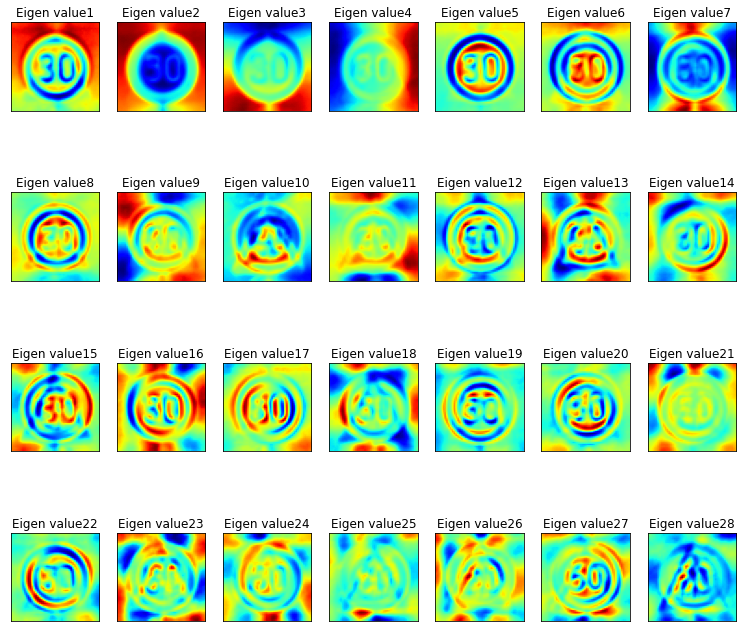

In [287]:
#plotting eigen values
plt.figure(figsize=(13,12))

x_row=4
y_col=7

for i in list(range(x_row*y_col)):
    
    plt.subplot(x_row,y_col,i+1)
    plt.imshow(eigenvalues2[i].reshape(48,48),cmap='jet')
    title_='Eigen value'+str(i+1)
    plt.title(title_)
    plt.xticks(())
    plt.yticks(())
plt.show() 

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

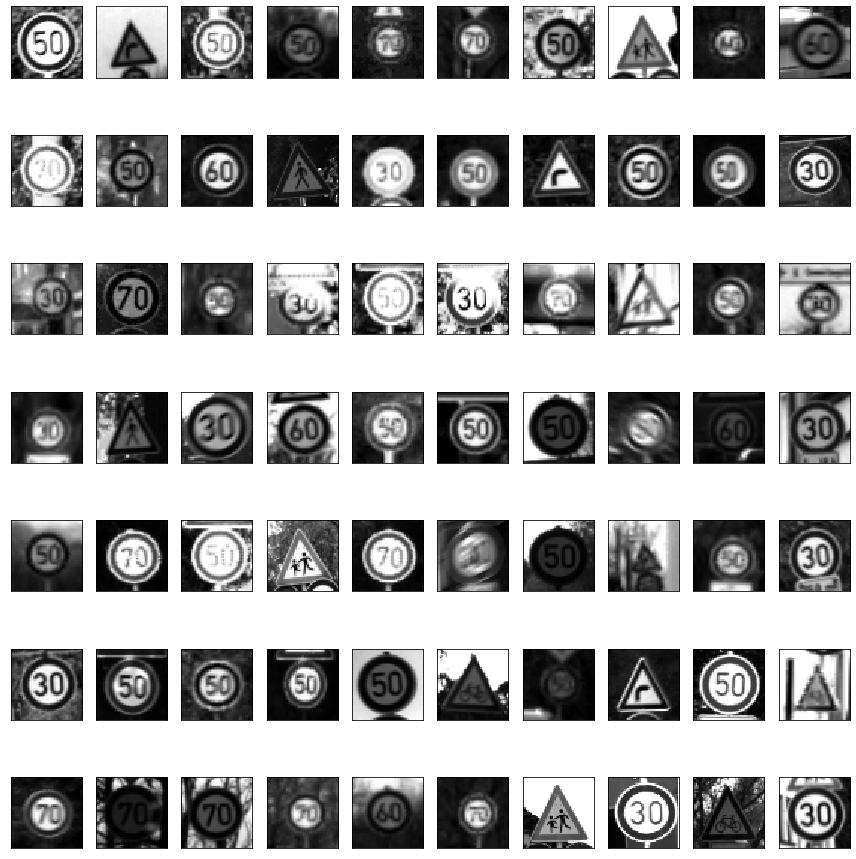

In [288]:
#plotting the actual data

plt.figure(figsize=(12,13))

for i in list(range(0,70)):
    plt.subplot(7,10,i+1)
    
    plt.imshow(XYraw.iloc[i].values.reshape(48,48), interpolation = "none", cmap = "gray")
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
               
plt.tight_layout

In [289]:
#standardising data and implementing pca

X_=XYraw[:9060].values
X_std_=StandardScaler().fit_transform(X_)
pca_=PCA(200)
X_10d=pca_.fit_transform(X_std_)
Target=target[:9060]



In [290]:
# implementing pca on minmax scaled data

X_=XYraw[:9060].values
X_mm_=MinMaxScaler().fit_transform(X_)
pca2_=PCA(200)
X_10dmm=pca2_.fit_transform(X_mm_)
Target=target[:9060]


In [291]:
X_std_


array([[ 0.00203108,  0.17251489,  0.34476711, ..., -0.27835878,
        -0.27521225, -0.25724278],
       [ 0.77574836,  0.76681554,  0.77190966, ...,  0.06727687,
         0.02479115, -0.05223114],
       [-0.20429353,  0.2241932 ,  0.02117426, ..., -0.32549092,
        -0.46468807, -0.50956479],
       ...,
       [-0.72010505, -0.71893609, -0.72956115, ..., -0.54544088,
        -0.40152946, -0.35186353],
       [-0.51378044, -0.34426829,  0.1506114 , ..., -0.73396942,
        -0.71732251, -0.69880629],
       [-0.5653616 , -0.5897403 , -0.54834915, ..., -0.73396942,
        -0.74890181, -0.74611667]])

In [292]:
X_mm_

array([[0.34      , 0.392     , 0.44621514, ..., 0.18      , 0.18326693,
        0.187251  ],
       [0.58      , 0.576     , 0.57768924, ..., 0.268     , 0.25896414,
        0.23904382],
       [0.276     , 0.408     , 0.34661355, ..., 0.168     , 0.13545817,
        0.12350598],
       ...,
       [0.116     , 0.116     , 0.11553785, ..., 0.112     , 0.15139442,
        0.16334661],
       [0.18      , 0.232     , 0.38645418, ..., 0.064     , 0.07171315,
        0.07569721],
       [0.164     , 0.156     , 0.17131474, ..., 0.064     , 0.06374502,
        0.06374502]])

In [293]:
X_10d.shape

(9060, 200)

In [294]:
X_10dmm.shape

(9060, 200)

In [295]:
eigenvalues_=pca_.components_


In [297]:
#visualisation of pca representations

trace = go.Scatter(
    x = X_10d[:,0],
    y = X_10d[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA with Standard Scaling',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

In [298]:
eigenvalues2_=pca2_.components_

In [299]:
#visualisation of pca representations

trace = go.Scatter(
    x = X_10dmm[:,0],
    y = X_10dmm[:,1],
    name = str(Target),
    
    mode = 'markers',
    text = Target,
    showlegend = False,
    marker = dict(
        size = 8,
        color = Target,
        colorscale ='Jet',
        showscale = False,
        line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        ),
        
        opacity = 0.8
    )
)

data=[trace]

layout=go.Layout(title='PCA with MinMax Scaling',
                hovermode='closest',
                xaxis=dict(
                    title='First principal direction',
                    ticklen=5,
                    zeroline=False),
                 yaxis=dict(
                 title='Second principal direction',
                 ticklen=5
            ),
                 showlegend=True
                
                    
                )
fig=dict(data=data,layout=layout)
py.iplot(fig,filename='pca')

In [300]:
from sklearn.cluster import KMeans

In [301]:
print(X_std)

[[ 0.00440529  0.17377502  0.3446343  ... -0.27951396 -0.27663942
  -0.25814815]
 [ 0.77842564  0.76788652  0.77128602 ...  0.06533494  0.02288531
  -0.0534335 ]
 [-0.20200014  0.22543688  0.02141331 ... -0.32653881 -0.46581293
  -0.51010464]
 ...
 [-0.58901032  0.00587394  0.57735342 ...  0.48855858  0.84263719
   0.70243598]
 [ 2.13296126  2.13692606  2.05124117 ...  2.9181758   2.71860784
   1.8362402 ]
 [ 0.19791038  0.84537932  1.28843962 ... -0.34221376 -0.32393279
  -0.30538999]]


In [302]:
from sklearn import metrics

In [303]:
#Q1. How to choose number of clusters? #Q2. =Will the scaling of data change the Kmeans clustering?

#Set number of clusters at initialisation time
k_means_12 = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means_12.fit(X_std)
model
#Generate cluster predictions and store in y_hat
y_hat = k_means_12.predict(X_std)
print('Std scaling')
print("k = 12: Interia: %d " % (k_means_12.inertia_))
labels = k_means_12.labels_
print("k = 12: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("k = 12: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("k = 12: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 12: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std scaling
k = 12: Interia: 8170261 
k = 12: Silhouette Score: 0.13429
k = 12: Calinski Harabasz Score: 1524
k = 12: Result: 854 out of 9690 samples were correctly labeled.
k = 12: Accuracy score: 0.09


In [304]:
#will this change if we use minmax scalling
#Set number of clusters at initialisation time
k_means_12mm = KMeans(n_clusters=12)
#Run the clustering algorithm
model = k_means_12mm.fit(X_mm)
model
#Generate cluster predictions and store in y_hat
y_hatmm = k_means_12mm.predict(X_std)
print('Minmax Scaling')
print("k = 12: Interia: %d " % (k_means_12mm.inertia_))
labels = k_means_12mm.labels_
print("k = 12: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("k = 12: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("k = 12: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 12: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Minmax Scaling
k = 12: Interia: 570428 
k = 12: Silhouette Score: 0.13655
k = 12: Calinski Harabasz Score: 1589
k = 12: Result: 719 out of 9690 samples were correctly labeled.
k = 12: Accuracy score: 0.07


In [305]:
k_means_8 = KMeans(n_clusters=8)
model = k_means_8.fit(X_std)
y_hat_8 = k_means_8.predict(X_std)
print('Std Scaling')
print("k = 8: Interia: %d " % (k_means_8.inertia_))
labels = k_means_8.labels_
print("k = 8: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("k = 8: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("k = 8: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 8: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling
k = 8: Interia: 8971464 
k = 8: Silhouette Score: 0.15635
k = 8: Calinski Harabasz Score: 2058
k = 8: Result: 886 out of 9690 samples were correctly labeled.
k = 8: Accuracy score: 0.09


In [306]:
k_means_8mm = KMeans(n_clusters=8)
model = k_means_8mm.fit(X_mm)
y_hat_8mm = k_means_8mm.predict(X_mm)
print('MinMax Scaling')
print("k = 8: Interia: %d " % (k_means_8mm.inertia_))
labels = k_means_8mm.labels_
print("k = 8: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("k = 8: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("k = 8: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 8: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMax Scaling
k = 8: Interia: 627151 
k = 8: Silhouette Score: 0.15354
k = 8: Calinski Harabasz Score: 2148
k = 8: Result: 1154 out of 9690 samples were correctly labeled.
k = 8: Accuracy score: 0.12


In [307]:
#for each value of k, we can initialise k_means and
#use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_std)
    sum_of_squared_distances.append(k_means.inertia_)

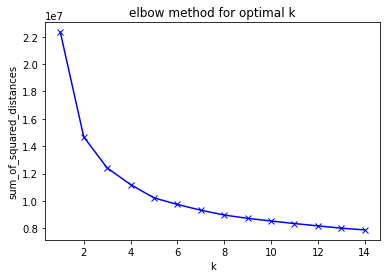

In [308]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k')
plt.show()

In [344]:

#use inertia to identify the sum of squared distances of samples to the nearest cluster centre
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    k_means = KMeans(n_clusters=k)
    model = k_means.fit(X_mm)
    sum_of_squared_distances.append(k_means.inertia_)

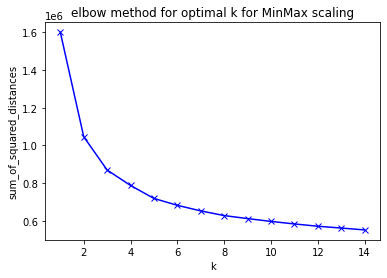

In [348]:
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('sum_of_squared_distances')
plt.title('elbow method for optimal k for MinMax scaling')
plt.show()

In [309]:
# Elbow graph suggest that 
k_means_5 = KMeans(n_clusters=5)
model = k_means_5.fit(X_std)
y_hat_5 = k_means_5.predict(X_std)
print('Std Scaling')
print("k = 5: Interia: %d " % (k_means_5.inertia_))
labels = k_means_5.labels_
print("k = 5: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("k = 5: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("k = 5: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 5: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling
k = 5: Interia: 10223284 
k = 5: Silhouette Score: 0.21465
k = 5: Calinski Harabasz Score: 2866
k = 5: Result: 1706 out of 9690 samples were correctly labeled.
k = 5: Accuracy score: 0.18


In [310]:
k_means_5mm = KMeans(n_clusters=5)
model = k_means_5mm.fit(X_mm)
y_hat_5mm = k_means_5mm.predict(X_mm)
print('MinMax Scaling')
print("k = 5: Interia: %d " % (k_means_5mm.inertia_))
labels = k_means_5mm.labels_
print("k = 5: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("k = 5: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("k = 5: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 5: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMax Scaling
k = 5: Interia: 718108 
k = 5: Silhouette Score: 0.21445
k = 5: Calinski Harabasz Score: 2977
k = 5: Result: 1235 out of 9690 samples were correctly labeled.
k = 5: Accuracy score: 0.13


In [346]:
# Elbow graph suggest that 
k_means_3 = KMeans(n_clusters=3)
model = k_means_3.fit(X_std)
y_hat_3 = k_means_3.predict(X_std)
print('Std Scaling')
print("k = 3: Interia: %d " % (k_means_3.inertia_))
labels = k_means_3.labels_
print("k = 3: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("k = 3: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("k = 3: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 3: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling
k = 3: Interia: 12412909 
k = 3: Silhouette Score: 0.31755
k = 3: Calinski Harabasz Score: 3867
k = 3: Result: 1515 out of 9690 samples were correctly labeled.
k = 3: Accuracy score: 0.16


In [347]:
k_means_3mm = KMeans(n_clusters=3)
model = k_means_3mm.fit(X_mm)
y_hat_3mm = k_means_3mm.predict(X_mm)
print('MinMax Scaling')
print("k = 3: Interia: %d " % (k_means_3mm.inertia_))
labels = k_means_5mm.labels_
print("k = 3: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("k = 3: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("k = 3: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 3: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMax Scaling
k = 3: Interia: 869078 
k = 3: Silhouette Score: 0.21445
k = 3: Calinski Harabasz Score: 2977
k = 3: Result: 1235 out of 9690 samples were correctly labeled.
k = 3: Accuracy score: 0.13


In [311]:
# but we know that we have 10 classes so ideally we would like our data to be 
#clustered into 10 classes
k_means_10 = KMeans(n_clusters=10)
model = k_means_10.fit(X_std)
y_hat_10 = k_means_10.predict(X_std)
print('Std Scaling')
print("k = 10: Interia: %d " % (k_means_10.inertia_))
labels = k_means_10.labels_
print("k = 10: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("k = 10: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)

print("k = 10: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 10: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling
k = 10: Interia: 8532422 
k = 10: Silhouette Score: 0.15372
k = 10: Calinski Harabasz Score: 1738
k = 10: Result: 646 out of 9690 samples were correctly labeled.
k = 10: Accuracy score: 0.07


In [312]:
k_means_10mm = KMeans(n_clusters=10)
model = k_means_10mm.fit(X_mm)
y_hat_10mm = k_means_10mm.predict(X_mm)
print('MinMax Scaling')
print("k = 10: Interia: %d " % (k_means_10mm.inertia_))
labels = k_means_10mm.labels_
print("k = 10: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("k = 10: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
# first ten predicted labels 

print("k = 10: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('k = 10: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMax Scaling
k = 10: Interia: 597403 
k = 10: Silhouette Score: 0.13921
k = 10: Calinski Harabasz Score: 1807
k = 10: Result: 961 out of 9690 samples were correctly labeled.
k = 10: Accuracy score: 0.10


In [314]:
tracekmeans = go.Scatter(x=X_std[:, 0], y= X_std[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = y_hat_10,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))

layout=go.Layout(title='Kmeans clustering Std Scaling k=10',
                 hovermode='closest',
                 xaxis=dict(title='first principal direction',
                           ticklen=5,
                           zeroline=False,
                           gridwidth=2),
                 yaxis=dict(title='second principal component',
                           ticklen=5,
                           gridwidth=2),
                 showlegend=True
                     )

data = [tracekmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1)

In [315]:
tracekmeans = go.Scatter(x=X_mm[:, 0], y= X_mm[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = y_hat_10mm,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))


layout=go.Layout(title='Kmeans clustering MinMax Scaling k =10',
                 hovermode='closest',
                 xaxis=dict(title='first principal direction',
                           ticklen=5,
                           zeroline=False,
                           gridwidth=2),
                 yaxis=dict(title='second principal component',
                           ticklen=5,
                           gridwidth=2),
                 showlegend=True
                     )

data = [tracekmeans]
fig1 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig1)

In [316]:
#kmeans clustering and visiulisation on feature reduced dataset

from sklearn.cluster import KMeans
kmeans=KMeans(10)
X_clustered=kmeans.fit_predict(X_10d)
print('Std Scaling')
print("k = 10: Interia: %d " % (kmeans.inertia_))
labels = kmeans.labels_
print("k = 10: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_10d, labels, metric = 'euclidean')))
print("k = 10: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_10d, labels)))


Std Scaling
k = 10: Interia: 7616767 
k = 10: Silhouette Score: 0.16130
k = 10: Calinski Harabasz Score: 1697


In [317]:
tracekmeans = go.Scatter(x=X_10d[:, 0], y= X_10d[:, 1], mode="markers",
                    showlegend=False,
                    marker=dict(
                            size=8,
                            color = X_clustered,
                            colorscale = 'Portland',
                            showscale=False, 
                            line = dict(
            width = 2,
            color = 'rgb(255, 255, 255)'
        )
                   ))


layout=go.Layout(title='Kmeans clustering',
                 hovermode='closest',
                 xaxis=dict(title='first principal direction',
                           ticklen=5,
                           zeroline=False,
                           gridwidth=2),
                 yaxis=dict(title='second principal component',
                           ticklen=5,
                           gridwidth=2),
                 showlegend=True
                     )

data = [tracekmeans]
fig3 = dict(data=data, layout= layout)
# fig1.append_trace(contour_list)
py.iplot(fig3)

In [318]:
#using LDA  (Linear Discriminant analysis)
lda=LDA(n_components=9)
X_lda = lda.fit_transform(X_std_,Target.values)

In [319]:
traceLDA=go.Scatter(x=X_lda[:,0],
                    y=X_lda[:,1],
                    #name=str(Target),
                    mode='markers',
                    #text=Target,
                    marker=dict(size=8,
                                color=Target,
                                colorscale='jet',
                                showscale=False,
                                line=dict(width=2,
                                         color='rgb(255,255,255)'
                                         ),
                                opacity=0.8
                               )
                )

data=traceLDA

layout=go.Layout(xaxis=dict(title='First Linear discriminant',
                           ticklen=5,
                           gridwidth=2),
                yaxis=dict(title='Second linear discriminant',
                           ticklen=5,
                           gridwidth=2),
                 title='LDA',
                 showlegend=True,
                 hovermode='closest')

fig=dict(data=data,layout=layout)
py.iplot(fig)

In [320]:
kmeans10 = KMeans(init="random", n_clusters=10, n_init=100, max_iter=300, random_state=42 )
kmeans10.fit(X_std) #Replace your training dataset instead of x_train
print('Std Scaling: Seed 10, K= 10')
print("seed = 10: Interia: %d " % (kmeans10.inertia_))
labels = kmeans10.labels_
print("seed = 10: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("seed = 10: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("seed = 10: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('seed = 10: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling: Seed 10, K= 10
seed = 10: Interia: 8531954 
seed = 10: Silhouette Score: 0.15377
seed = 10: Calinski Harabasz Score: 1738
seed = 10: Result: 1362 out of 9690 samples were correctly labeled.
seed = 10: Accuracy score: 0.14


In [321]:
kmeans10mm = KMeans(init="random", n_clusters=10, n_init=100, max_iter=300, random_state=42 )
kmeans10mm.fit(X_mm) #Replace your training dataset instead of x_train
print('MinMaxScaling: Seed 10, K= 10')
print("seed = 10: Interia: %d " % (kmeans10mm.inertia_))
labels = kmeans10mm.labels_
print("seed = 10: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("seed = 10: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("seed = 10: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('seed = 10: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMaxScaling: Seed 10, K= 10
seed = 10: Interia: 596071 
seed = 10: Silhouette Score: 0.14367
seed = 10: Calinski Harabasz Score: 1813
seed = 10: Result: 865 out of 9690 samples were correctly labeled.
seed = 10: Accuracy score: 0.09


In [322]:
kmeans50 = KMeans(init="random", n_clusters=10, n_init=50, max_iter=300, random_state=42 )
kmeans50.fit(X_std) #Replace your training dataset instead of x_train
print('Std Scaling: Seed 50, K= 10')
print("Seed = 50: Interia: %d " % (kmeans50.inertia_))
labels = kmeans50.labels_
print("Seed = 50: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("Seed = 50: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("Seed = 50: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('Seed = 50: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling: Seed 50, K= 10
Seed = 50: Interia: 8532140 
Seed = 50: Silhouette Score: 0.14467
Seed = 50: Calinski Harabasz Score: 1738
Seed = 50: Result: 1051 out of 9690 samples were correctly labeled.
Seed = 50: Accuracy score: 0.11


In [333]:
kmeans50mm = KMeans(init="random", n_clusters=10, n_init=50, max_iter=300, random_state=42 )
kmeans50mm.fit(X_mm) #Replace your training dataset instead of x_train
print('MinMax Scaling: Seed 50, K= 10')
print("Seed = 50: Interia: %d " % (kmeans50mm.inertia_))
labels = kmeans50mm.labels_
print("Seed = 50: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("Seed = 50: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("Seed = 50: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('Seed = 50: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMax Scaling: Seed 50, K= 10
Seed = 50: Interia: 597417 
Seed = 50: Silhouette Score: 0.13451
Seed = 50: Calinski Harabasz Score: 1807
Seed = 50: Result: 1221 out of 9690 samples were correctly labeled.
Seed = 50: Accuracy score: 0.13


In [324]:
kmeans100 = KMeans(init="random", n_clusters=10, n_init=100, max_iter=300, random_state=42 )
kmeans100.fit(X_std) #Replace your training dataset instead of x_train
print('Std Scaling: Seed 100, K= 10')
print("Seed = 100: Interia: %d " % (kmeans100.inertia_))
labels = kmeans100.labels_
print("Seed = 100: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_std, labels, metric = 'euclidean')))
print("Seed = 100: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_std, labels)))
correct_labels = sum(target == labels)
print("Seed = 100: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('Seed = 100: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

Std Scaling: Seed 100, K= 10
Seed = 100: Interia: 8531954 
Seed = 100: Silhouette Score: 0.15377
Seed = 100: Calinski Harabasz Score: 1738
Seed = 100: Result: 1362 out of 9690 samples were correctly labeled.
Seed = 100: Accuracy score: 0.14


In [325]:
kmeans100mm = KMeans(init="random", n_clusters=10, n_init=100, max_iter=300, random_state=42 )
kmeans100mm.fit(X_mm) #Replace your training dataset instead of x_train
print('MinMaxScaling: Seed 100, K= 10')
print("Seed = 100: Interia: %d " % (kmeans100mm.inertia_))
labels = kmeans100mm.labels_
print("Seed = 100: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(X_mm, labels, metric = 'euclidean')))
print("Seed = 100: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(X_mm, labels)))
correct_labels = sum(target == labels)
print("Seed = 100: Result: %d out of %d samples were correctly labeled." % (correct_labels, target.size))

print('Seed = 100: Accuracy score: {0:0.2f}'. format(correct_labels/float(target.size)))

MinMaxScaling: Seed 100, K= 10
Seed = 100: Interia: 596071 
Seed = 100: Silhouette Score: 0.14367
Seed = 100: Calinski Harabasz Score: 1813
Seed = 100: Result: 865 out of 9690 samples were correctly labeled.
Seed = 100: Accuracy score: 0.09


In [334]:
# read data with reduced features 
Top_20_Exploratory = pd.read_csv ('Top_20_Exploratory_random.csv')

In [335]:
y = Top_20_Exploratory['Class']

In [336]:
T20 = Top_20_Exploratory.values

In [337]:
T20_std = StandardScaler().fit_transform(T20)

In [338]:
T20_mm = MinMaxScaler().fit_transform(T20)

In [339]:
# investigate clstering and class assignment in the best feature reduced dataset from previous experiments

from sklearn.cluster import KMeans
kmeansT20 = KMeans(init="random", n_clusters=10, n_init=50, max_iter=300, random_state=42 )
kmeansT20.fit(T20_std) #Replace your training dataset instead of x_train
print('Std Scaling on Top 20 Exploratory Dataset: Seed 50, K= 10')
print("Seed = 50: Interia: %d " % (kmeansT20.inertia_))
labels = kmeansT20.labels_
print("Seed = 50: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(T20_std, labels, metric = 'euclidean')))
print("Seed = 50: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(T20_std, labels)))
correct_labels = sum(y == labels)
print("Seed = 50: Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Seed = 50: Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

Std Scaling on Top 20 Exploratory Dataset: Seed 50, K= 10
Seed = 50: Interia: 332790 
Seed = 50: Silhouette Score: 0.18382
Seed = 50: Calinski Harabasz Score: 2682
Seed = 50: Result: 337 out of 9690 samples were correctly labeled.
Seed = 50: Accuracy score: 0.03


In [340]:
kmeansT20mm = KMeans(init="random", n_clusters=10, n_init=50, max_iter=300, random_state=42 )
kmeansT20mm.fit(T20_mm) #Replace your training dataset instead of x_train
print('MinMax Scaling on Top 20 Exploratory Dataset: Seed 50, K= 10')
print("Seed = 50: Interia: %d " % (kmeansT20mm.inertia_))
labels = kmeansT20mm.labels_
print("Seed = 50: Silhouette Score: {0:0.5f}".format(metrics.silhouette_score(T20_mm, labels, metric = 'euclidean')))
print("Seed = 50: Calinski Harabasz Score: %d" % (metrics.calinski_harabasz_score(T20_mm, labels)))
correct_labels = sum(y == labels)
print("Seed = 50: Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Seed = 50: Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

MinMax Scaling on Top 20 Exploratory Dataset: Seed 50, K= 10
Seed = 50: Interia: 22858 
Seed = 50: Silhouette Score: 0.18977
Seed = 50: Calinski Harabasz Score: 2921
Seed = 50: Result: 682 out of 9690 samples were correctly labeled.
Seed = 50: Accuracy score: 0.07


In [341]:
# training gaussian mixture model 
from sklearn.mixture import GaussianMixture

In [342]:
data = X_mm
gmm = GaussianMixture(n_components=10)
XG_clustered= gmm.fit(data)
#correctly scored samples
correct_labels = sum(y == labels)
print('X: MinMax scaling')
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

X: MinMax scaling
Result: 682 out of 9690 samples were correctly labeled.
Accuracy score: 0.07


In [343]:
data = X_std
gmm = GaussianMixture(n_components=10)
XG_clustered= gmm.fit(data)
#correctly scored samples
correct_labels = sum(y == labels)
print('X: Std scaling')
print("Result: %d out of %d samples were correctly labeled." % (correct_labels, y.size))

print('Accuracy score: {0:0.2f}'. format(correct_labels/float(y.size)))

X: Std scaling
Result: 682 out of 9690 samples were correctly labeled.
Accuracy score: 0.07
